In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json

In [2]:
res_dir='results/1026ds_change_SN'
res_dir="results/1027ds_change_n_lit"

json_files = glob.glob(res_dir+'/*.json')
print(len(json_files))

df=None

for i,json_file in enumerate(json_files):
    #raw_dict.update(json.load(open(json_file)))
    res_dict={}
    raw_dict=(json.load(open(json_file)))

    for key in raw_dict.keys():
        if key.find("_")==-1:
            res_dict[f"{i}_{key}"]=raw_dict[key]
            if key+'_c' in raw_dict.keys():
                res_dict[f"{i}_{key}"].update(raw_dict[key+'_c'])
            if key+'_e' in raw_dict.keys():
                res_dict[f"{i}_{key}"].update(raw_dict[key+'_e'])
        
    temp_df=pd.DataFrame(res_dict).T
    if df is None:
        df=temp_df
    else:
        df=pd.concat([df,temp_df],ignore_index=True)

df[:3]

1


,train_runtime,train_samples_per_second,train_steps_per_second,train_loss,epoch,epochs,n_lit,n_irrelevant_texts,score,pred_log
0_1-0-1,17.0124,0.059,0.059,2.442517,1.0,1,1,0,0.206667,[{'problem': 'You are a great scientist. Answe...
0_2-0-1,19.0423,0.105,0.053,2.24342,1.0,1,2,0,0.206667,[{'problem': 'You are a great scientist. Answe...
0_3-0-1,20.594,0.146,0.049,2.280003,1.0,1,3,0,0.24,[{'problem': 'You are a great scientist. Answe...


In [3]:
if "n_contexts" not in df.columns:
    df["n_contexts"]=df["n_lit"]

In [4]:
#sns.set_style("whitegrid")
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [6, 6]
sns.set_palette("muted")
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


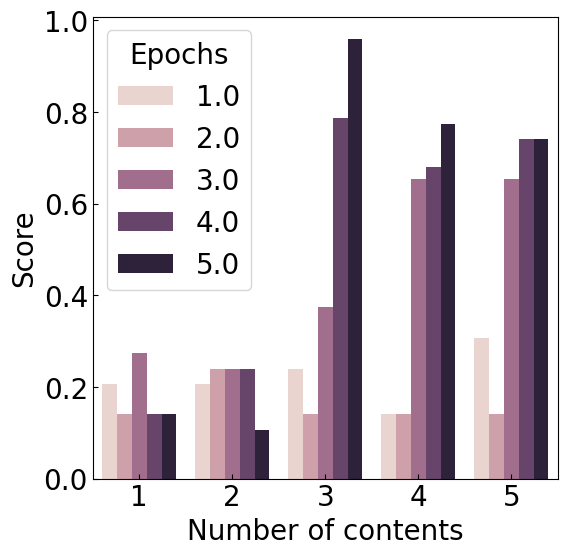

In [5]:
plt_df=df.copy()
plt_df=plt_df[plt_df["n_irrelevant_texts"]==0]
plt_df=plt_df[plt_df["n_contexts"]<=5]
sns.barplot(data=plt_df,x="n_contexts",y="score",hue="epoch")
#plt.xscale("log")

plt.xlabel("Number of contents")
plt.ylabel("Score")
plt.legend(title="Epochs")

/tmp/ipykernel_2812459/2123413631.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=plt_df,x="n_irrelevant_texts",y="score",hue="n_contexts",s=150,palette="Blues_d")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


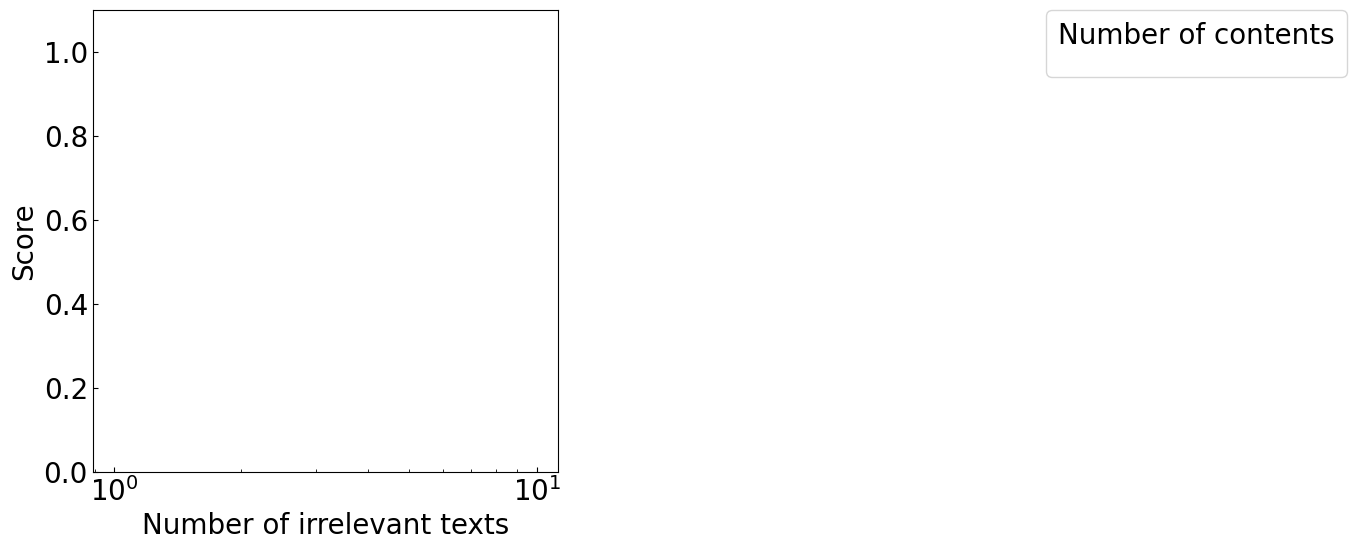

In [6]:
plt_df=df.copy()
plt_df=plt_df[plt_df["n_irrelevant_texts"]>0]
plt_df=plt_df[plt_df["n_contexts"]<=5]
sns.scatterplot(data=plt_df,x="n_irrelevant_texts",y="score",hue="n_contexts",s=150,palette="Blues_d")
plt.xscale("log")

plt.ylim(0,1.1)
plt.xlabel("Number of irrelevant texts")
plt.ylabel("Score")
plt.legend(title="Number of contents",bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0, fontsize=22)

In [8]:
df.to_csv("results/gpteval/zero.csv")